In [1]:
import boost_histogram as bh
import numpy as np
import matplotlib.pyplot as plt
import uproot
import mplhep as hep
import matplotlib as mpl
from copy import deepcopy

In [2]:
myfile = "WZG_2018.root"
tree = uproot.open(myfile)
tree.keys(filter_name="*mlla*WZG_WZG_PS*")

['WZG_WZG_mlla_WZG_WZG_PSWeight_IsrUp;1',
 'WZG_WZG_mlla_WZG_WZG_PSWeight_IsrDown;1',
 'WZG_WZG_mlla_WZG_WZG_PSWeight_FsrUp;1',
 'WZG_WZG_mlla_WZG_WZG_PSWeight_FsrDown;1']

In [3]:
tree.keys(filter_name="*mlla*WZG_WZG_s*")

['WZG_WZG_mlla_WZG_WZG_scaleUp;1', 'WZG_WZG_mlla_WZG_WZG_scaleDown;1']

In [5]:
tree.keys(filter_name="*mlla*WZG_WZG_p*")

['WZG_WZG_mlla_WZG_WZG_pdfUp;1', 'WZG_WZG_mlla_WZG_WZG_pdfDown;1']

In [15]:
WZG_PS_FSR_list = ['WZG_WZG_mlla_WZG_None',
'WZG_WZG_mlla_WZG_WZG_PSWeight_FsrUp',
'WZG_WZG_mlla_WZG_WZG_PSWeight_FsrDown']

WZG_PS_ISR_list = [
'WZG_WZG_mlla_WZG_None'
,'WZG_WZG_mlla_WZG_WZG_PSWeight_IsrUp'
,'WZG_WZG_mlla_WZG_WZG_PSWeight_IsrDown'
]

WZG_scale_list = [
'WZG_WZG_mlla_WZG_None'
,'WZG_WZG_mlla_WZG_WZG_scaleUp'
,'WZG_WZG_mlla_WZG_WZG_scaleDown'
]

WZG_pdf_list = [
'WZG_WZG_mlla_WZG_None'
,'WZG_WZG_mlla_WZG_WZG_pdfUp'
,'WZG_WZG_mlla_WZG_WZG_pdfDown'
]

In [10]:
import mplhep as hep

In [67]:
def make_hist(key_list):

    plt.close()
    plt.style.use(hep.style.CMS)

    # 1. Define subplots for the raio
    fig, ax = plt.subplots(2,1,figsize=(10,10)
                           ,sharex=True, # share axis x
                           gridspec_kw={'height_ratios': [4, 1]}) # upper and lower plot size ratio
    fig.subplots_adjust(hspace=.07) # space between plots

    # 2. Draw plots
    Yield_stack =[]
    for idx,k in enumerate(key_list):
        contents = tree[k].values()
        bins = tree[k].axis().edges()
        if idx ==0:
            hep.histplot(contents,bins,color='black',histtype='errorbar',label="Central",yerr=True,ax=ax[0])
        else:
            hep.histplot(contents,bins,label=k.split('WZG_')[-1],ax=ax[0])
        Yield_stack.append(np.sum(contents))

    # 3. Draw ratio
    tree[key_list[1]].values()
    tree[key_list[0]].values()
    tree[key_list[2]].values()

    ratio_up = np.divide(tree[key_list[1]].values(),tree[key_list[0]].values(),out=np.zeros_like(tree[key_list[1]].values()),where=tree[key_list[0]].values()!=0)
    ratio_down = np.divide(tree[key_list[2]].values(),tree[key_list[0]].values(),out=np.zeros_like(tree[key_list[2]].values()),where=tree[key_list[0]].values()!=0) 

    ratio_center = tree[key_list[0]].values() / tree[key_list[0]].values()
    hep.histplot(ratio_up,bins,ax=ax[1])
    hep.histplot(ratio_down,bins,ax=ax[1])
    hep.histplot(ratio_center,bins,ax=ax[1],color='black',histtype='errorbar',yerr=True)
    
    # 4. Rest of them

    # limit label ticks
    ax[1].set_ylim(0.5,1.5)
    ax[1].set_ylabel(r'$\frac{Up or Down}{Center}$')
    ax[0].set_xlim(80,500)
    ax[0].set_xticks(bins)
    ax[0].set_ylabel("Events/bins")
    
    # Set grids
    ax[0].grid(axis='both', which='major', linestyle='--',linewidth=1,alpha=0.2)
    ax[1].grid(axis='both', which='major', linestyle='--',linewidth=1,alpha=0.9)

    # Set subticks 
    ax[0].xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
    ax[1].xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))

    # Legend
    ax[0].legend(handles=ax[0].get_legend_handles_labels()[0],labels=ax[0].get_legend_handles_labels()[1],loc='upper right')
    hep.cms.label(ax=ax[0],year='2018',lumi=59.7)
  

    print(f"Upper unc : {100 * abs(Yield_stack[1] - Yield_stack[0]) / Yield_stack[0]:.2f} %")
    print(f"Lower unc : {100 * abs(Yield_stack[2] - Yield_stack[0]) / Yield_stack[0]:.2f} %")

Upper unc : 29.90 %
Lower unc : 29.65 %


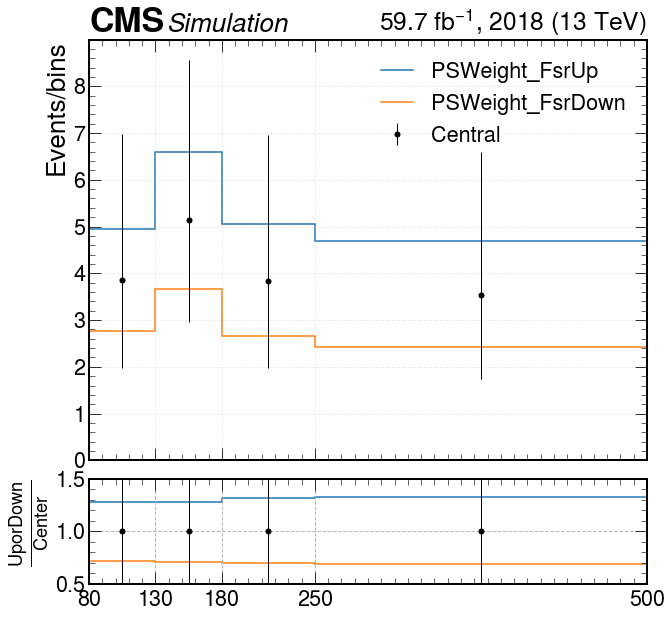

In [68]:
make_hist(WZG_PS_FSR_list)

Upper unc : 9.82 %
Lower unc : 9.88 %


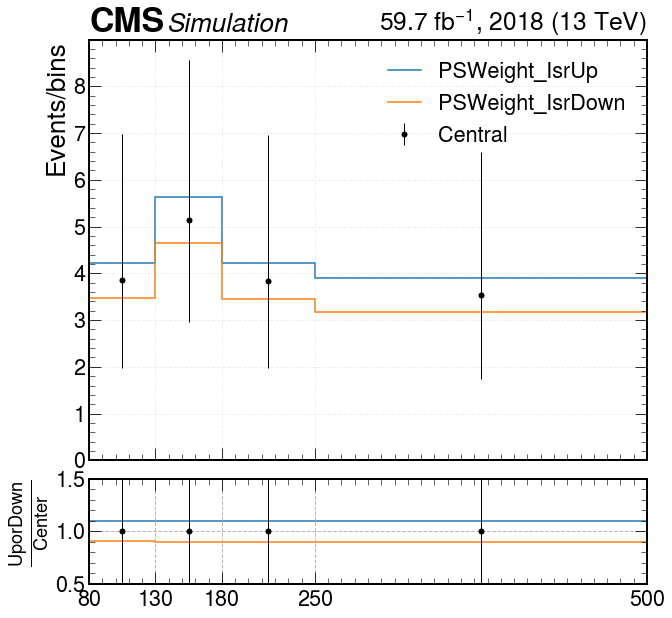

In [69]:
make_hist(WZG_PS_ISR_list)

Upper unc : 11.59 %
Lower unc : 10.05 %


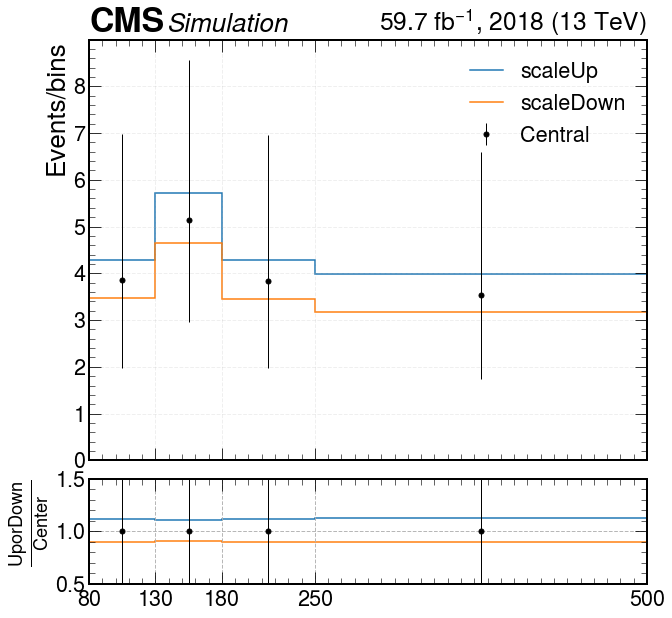

In [70]:
make_hist(WZG_scale_list)

Upper unc : 4.25 %
Lower unc : 4.25 %


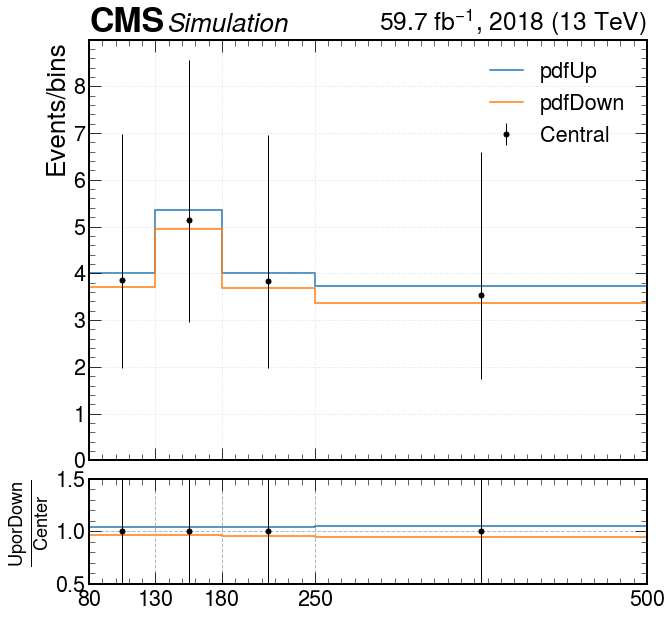

In [71]:
make_hist(WZG_pdf_list)